In [2]:
import spacy 

spacy.__version__

'3.7.2'

In [3]:
nlp = spacy.load("en_core_web_sm")

### Task 3. Convert a string containing human language text into lists of sentences and words.

Word tokenization

In [30]:
text = """The sun peeked through the clouds, casting a warm glow over the tranquil meadow. \
Birds chirped melodiously, creating a symphony that echoed through the trees. \
The scent of freshly cut grass mingled with the sweet fragrance of blooming flowers, \
creating a delightful aroma in the air. A gentle breeze danced through the leaves, \
causing them to rustle softly. In that serene moment, everything felt harmonious and alive, embracing the beauty of nature.""" 

In [31]:
doc = text
doc_nlp = nlp(doc)

print(type(doc))
print(type(doc_nlp))

<class 'str'>
<class 'spacy.tokens.doc.Doc'>


In [32]:
[token.text for token in doc_nlp]

['The',
 'sun',
 'peeked',
 'through',
 'the',
 'clouds',
 ',',
 'casting',
 'a',
 'warm',
 'glow',
 'over',
 'the',
 'tranquil',
 'meadow',
 '.',
 'Birds',
 'chirped',
 'melodiously',
 ',',
 'creating',
 'a',
 'symphony',
 'that',
 'echoed',
 'through',
 'the',
 'trees',
 '.',
 'The',
 'scent',
 'of',
 'freshly',
 'cut',
 'grass',
 'mingled',
 'with',
 'the',
 'sweet',
 'fragrance',
 'of',
 'blooming',
 'flowers',
 ',',
 'creating',
 'a',
 'delightful',
 'aroma',
 'in',
 'the',
 'air',
 '.',
 'A',
 'gentle',
 'breeze',
 'danced',
 'through',
 'the',
 'leaves',
 ',',
 'causing',
 'them',
 'to',
 'rustle',
 'softly',
 '.',
 'In',
 'that',
 'serene',
 'moment',
 ',',
 'everything',
 'felt',
 'harmonious',
 'and',
 'alive',
 ',',
 'embracing',
 'the',
 'beauty',
 'of',
 'nature',
 '.']

Sentence tokenization

In [33]:
text = """The sun peeked through the clouds, casting a warm glow over the tranquil meadow. \
Birds chirped melodiously, creating a symphony that echoed through the trees. \
The scent of freshly cut grass mingled with the sweet fragrance of blooming flowers, \
creating a delightful aroma in the air. A gentle breeze danced through the leaves, \
causing them to rustle softly. In that serene moment, everything felt harmonious and alive, embracing the beauty of nature.""" 

text

'The sun peeked through the clouds, casting a warm glow over the tranquil meadow. Birds chirped melodiously, creating a symphony that echoed through the trees. The scent of freshly cut grass mingled with the sweet fragrance of blooming flowers, creating a delightful aroma in the air. A gentle breeze danced through the leaves, causing them to rustle softly. In that serene moment, everything felt harmonious and alive, embracing the beauty of nature.'

In [34]:
text_nlp = nlp(text)
sentences = list(text_nlp.sents)

# number of sentences in our string
len(sentences)

5

In [35]:
for idx, sent in enumerate(sentences):
    print(f"{idx+1}." ,sent)

1. The sun peeked through the clouds, casting a warm glow over the tranquil meadow.
2. Birds chirped melodiously, creating a symphony that echoed through the trees.
3. The scent of freshly cut grass mingled with the sweet fragrance of blooming flowers, creating a delightful aroma in the air.
4. A gentle breeze danced through the leaves, causing them to rustle softly.
5. In that serene moment, everything felt harmonious and alive, embracing the beauty of nature.


In [17]:
# index positioning 

data = []

for token in text_nlp:
    to_add = (token, token.idx, token.is_alpha, token.is_stop)
    data.append(to_add) 


In [29]:
# list of tuples
# 1st item in a tuple is each token in the text, 2d - starting index of this token
# 3d - if a token is alphabetical (word), 4th - if a token is a stop word
data

[(The, 0, True, True),
 (sun, 4, True, False),
 (peeked, 8, True, False),
 (through, 15, True, True),
 (the, 23, True, True),
 (clouds, 27, True, False),
 (,, 33, False, False),
 (casting, 35, True, False),
 (a, 43, True, True),
 (warm, 45, True, False),
 (glow, 50, True, False),
 (over, 55, True, True),
 (the, 60, True, True),
 (tranquil, 64, True, False),
 (meadow, 73, True, False),
 (., 79, False, False),
 (Birds, 81, True, False),
 (chirped, 87, True, False),
 (melodiously, 95, True, False),
 (,, 106, False, False),
 (creating, 108, True, False),
 (a, 117, True, True),
 (symphony, 119, True, False),
 (that, 128, True, True),
 (echoed, 133, True, False),
 (through, 140, True, True),
 (the, 148, True, True),
 (trees, 152, True, False),
 (., 157, False, False),
 (The, 159, True, True),
 (scent, 163, True, False),
 (of, 169, True, True),
 (freshly, 172, True, False),
 (cut, 180, True, False),
 (grass, 184, True, False),
 (mingled, 190, True, False),
 (with, 198, True, True),
 (the, 203

In [19]:
import pandas as pd 

columns = ['token', 'start_index', 'is_alpha', 'is_stop_word']
df = pd.DataFrame(data, columns=columns)

In [20]:
df

,token,start_index,is_alpha,is_stop_word
0,The,0,True,True
1,sun,4,True,False
2,peeked,8,True,False
3,through,15,True,True
4,the,23,True,True
...,...,...,...,...
78,the,429,True,True
79,beauty,433,True,False
80,of,440,True,True
81,nature,443,True,False


Stop words 

In [21]:
import spacy

In [24]:
from spacy.lang.fr import stop_words as french_stop_words

french_stop_words = french_stop_words.STOP_WORDS

# number of French stop words
len(french_stop_words)

507

In [25]:
from spacy.lang.de import stop_words as german_stop_words

german_stop_words = german_stop_words.STOP_WORDS

# number of German stop words
len(german_stop_words)

543

In [210]:
for word in list(german_stop_words)[:15]:
    print(word)

darfst
hier
teil
ihrem
allen
sowie
bald
eben
hat
sich
deine
über
diesem
dabei
gehabt


### Task 4. Generate base forms of those words.

<b>Lemmatization</b> is the process of reducing inflected forms of a word while still ensuring that the reduced form belongs to the language. This reduced form, or root word, is called a lemma.
For example, words <em>was, were, been, being</em> are all forms of the lemma <em>be</em>. While the lemma table has the following paradigm in the English language: table, tables, table's and tables'.
English is not highly inflected language, unlike, for instance, Slavic languages. Ukrainian noun paradigm includes 14 words forms, adjective and verb paradigms - 24 each. 

In [40]:
for token in text_nlp[:10]:
    if str(token).lower() != str(token.lemma_):
        # print only if the word form is different from lemma
        print(f"{str(token):>20} : {str(token.lemma_)}")

              peeked : peek
              clouds : cloud
             casting : cast


### Task 5. Detect parts of speech and morphological features.

In [80]:
morph_info = []

for token in text_nlp:
    tup = (str(token), str(token.lemma_), str(token.tag_), token.pos_, spacy.explain(token.tag_), token.morph.to_dict())
    morph_info.append(tup)
    

.tag_ displays a fine-grained tag <br>
.pos_ displays a coarse-grained tagm which is the reduced version of the fine-grained tag

In [85]:
columns = ['token', 'lemma', 'tag', 'pos', 'tag_explanation', 'morph_features']
df = pd.DataFrame(morph_info, columns=columns)
df.loc[df.morph_features == {}, 'morph_features'] = '-'

df

,token,lemma,tag,pos,tag_explanation,morph_features
0,The,the,DT,DET,determiner,"{'Definite': 'Def', 'PronType': 'Art'}"
1,sun,sun,NN,NOUN,"noun, singular or mass",{'Number': 'Sing'}
2,peeked,peek,VBD,VERB,"verb, past tense","{'Tense': 'Past', 'VerbForm': 'Fin'}"
3,through,through,IN,ADP,"conjunction, subordinating or preposition",-
4,the,the,DT,DET,determiner,"{'Definite': 'Def', 'PronType': 'Art'}"
...,...,...,...,...,...,...
78,the,the,DT,DET,determiner,"{'Definite': 'Def', 'PronType': 'Art'}"
79,beauty,beauty,NN,NOUN,"noun, singular or mass",{'Number': 'Sing'}
80,of,of,IN,ADP,"conjunction, subordinating or preposition",-
81,nature,nature,NN,NOUN,"noun, singular or mass",{'Number': 'Sing'}


### Task 6. Dependency parsing.

<b>Dependency parsing</b> is the process of extracting the dependency graph of a sentence to represent its grammatical structure. It defines the dependency relationship between headwords and their dependents. The head of a sentence has no dependency and is called the root of the sentence. The verb is usually the root of the sentence. All other words are linked to the headword.

In [87]:
print(sentences[0])
print(type(sentences[0]))

The sun peeked through the clouds, casting a warm glow over the tranquil meadow.
<class 'spacy.tokens.span.Span'>


In [90]:
dependencies = []

for token in sentences[0]:
    dep_tuple = (token, token.tag_, token.head.text, token.dep_)
    dependencies.append(dep_tuple)

In [91]:
dependencies

[(The, 'DT', 'sun', 'det'),
 (sun, 'NN', 'peeked', 'nsubj'),
 (peeked, 'VBD', 'peeked', 'ROOT'),
 (through, 'IN', 'peeked', 'prep'),
 (the, 'DT', 'clouds', 'det'),
 (clouds, 'NNS', 'through', 'pobj'),
 (,, ',', 'peeked', 'punct'),
 (casting, 'VBG', 'peeked', 'advcl'),
 (a, 'DT', 'glow', 'det'),
 (warm, 'JJ', 'glow', 'amod'),
 (glow, 'NN', 'casting', 'dobj'),
 (over, 'IN', 'glow', 'prep'),
 (the, 'DT', 'meadow', 'det'),
 (tranquil, 'NN', 'meadow', 'compound'),
 (meadow, 'NN', 'over', 'pobj'),
 (., '.', 'peeked', 'punct')]

In [92]:
columns = ['token', 'tag', 'headword', 'dep']
df = pd.DataFrame(dependencies, columns=columns)

df

,token,tag,headword,dep
0,The,DT,sun,det
1,sun,NN,peeked,nsubj
2,peeked,VBD,peeked,ROOT
3,through,IN,peeked,prep
4,the,DT,clouds,det
5,clouds,NNS,through,pobj
6,",",",",peeked,punct
7,casting,VBG,peeked,advcl
8,a,DT,glow,det
9,warm,JJ,glow,amod


In [95]:
from spacy import displacy

displacy.serve(sentences[0], style='dep')

C:\Users\Фед\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [113]:
for dep in dependencies:
    print(f'{dep[0]} - {spacy.explain(dep[-1])}')

The - determiner
sun - nominal subject
peeked - root
through - prepositional modifier
the - determiner
clouds - object of preposition
, - punctuation
casting - adverbial clause modifier
a - determiner
warm - adjectival modifier
glow - direct object
over - prepositional modifier
the - determiner
tranquil - compound
meadow - object of preposition
. - punctuation


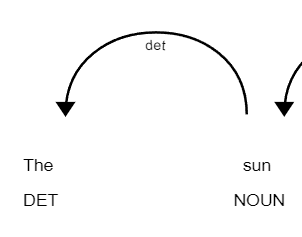

Determiner (det) <em>the</em> is dependent on the noun <em>Sun</em>. Together they form a noun phrase.

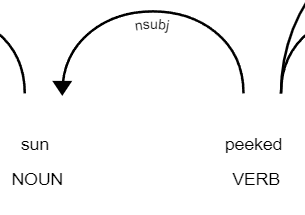

The verb <em>peeked</em> is the predicate of the sentence and its root, that's why the nominal subject (nsubj) <em>sun</em> is dependant on the verb <em>peeked.

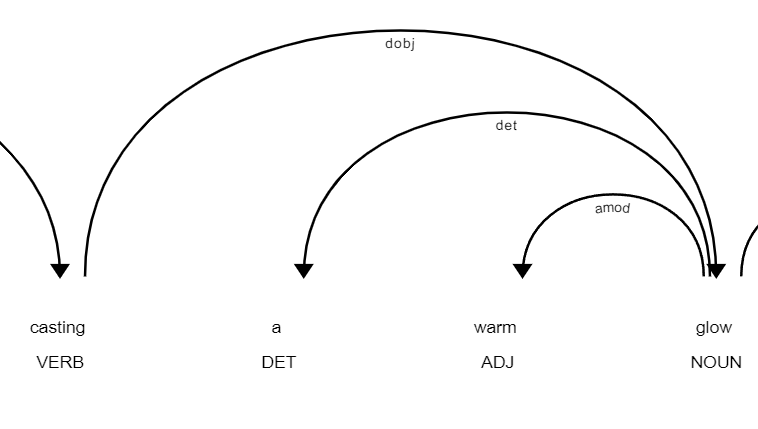



The verb <em>casting</em> starts an adverbial clause modifier (advcl), with <em>glow</em> being a direct object (dobj) of <em>casting</em>. The words <em>a</em> (determiner) and <em>warm</em> (adjective) modify the noun <em>glow</em> and are dependent on it.

### Task 7. Provide syntactic structure of the sentence.

Syntax in linguistics refers to the arrangement of words and phrases in a sentence.

English sentence depedencies

In [121]:
text = "I love you so much"
doc = nlp(text)
for i in doc:
    print(i.dep_)
    

nsubj
ROOT
dobj
advmod
advmod


Ukrainian language depedencies. As you can see, the model works properly, having correctly identified all the sentence parts

In [127]:
uk_nlp = spacy.load("uk_core_news_sm")

text = "Я тебе так сильно люблю"
doc = uk_nlp(text)
for i in doc:
    print(i.dep_)

nsubj
obj
advmod
advmod
ROOT


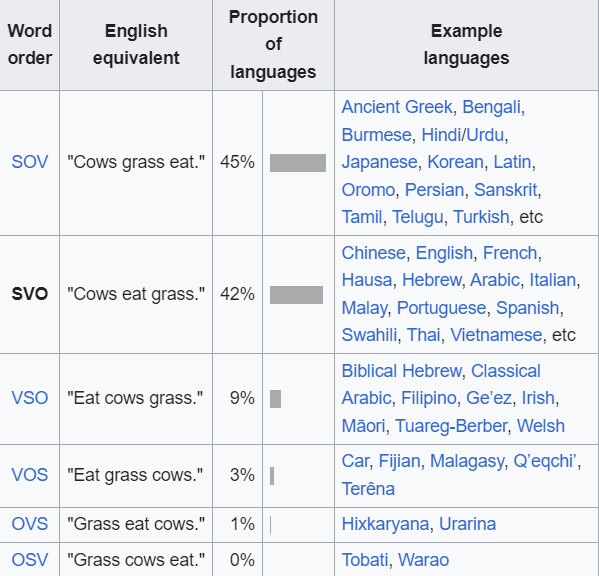

In linguistic typology, subject-object-verb (SOV) order is the most common one (45% of languages), then comes SVO order (42%), VSO (9%), VOS (3%), OVS (1%) and OSV (~0%)

Now we can use this knowledge to identify the syntactic structure of the sentence.

In [149]:
dep_dict = {
    'nsubj':'S',
    'ROOT':'V',
    'obj':'O',
    'dobj':'O'
}

def detect_synt_pattern(text):
    sent_structure = ""

    for i in text:
        if i.dep_ in dep_dict:
            sent_structure += str(dep_dict[i.dep_])
    
    return sent_structure

# doc - "Я тебе так сильно люблю"
print(detect_synt_pattern(doc))


SOV


It's worth mentioning that Ukrainian language just like all the other Slavic languages has a free word order, so it can be SOV (я тебе люблю), SVO (я люблю тебе), VOS (люблю тебе я), VSO (люблю я тебе), OVS (тебе люблю я) OSV (тебе я люблю), however, the first two options are the most common and acceptable. Also, various word orders may imply different contextual meaning each time.

In [154]:
# chinese language model
zh_nlp = spacy.load('zh_core_web_sm')

zh_text = "我是如此爱你"

zh_doc = zh_nlp(zh_text)

print(detect_synt_pattern(zh_doc))

SVO


In [167]:
# greek language model 

el_nlp = spacy.load('el_core_news_sm')

el_texts = [
     "Ο σκύλος της δάγκωσε τη μητέρα μου.",
     "Τα πουκάμισά της είναι τόσο βρώμικα.",
     "Το πρωινό μου ήταν αηδιαστικό.",
     "Ο πατέρας μου με άφησε επιτέλους να πάω στη ντίσκο."
]

for text in el_texts:
    el_doc = el_nlp(text)
    print(detect_synt_pattern(el_doc))

SVO
SV
SV
VOV


The syntactic structures of the first three sentences are identified correctly. However, in the last sentence, the subject of the sentence πατέρας (father) was identified incorrectly as ROOT (predicate):

In [171]:
for i in el_nlp(el_texts[-1]):
    print(i, i.dep_)

Ο det
πατέρας ROOT
μου nmod
με obj
άφησε ROOT
επιτέλους advmod
να aux
πάω punct
στη case
ντίσκο ccomp
. punct


### Task 8. Recognize named entities.

In [182]:
de_text = "Bismarck führte Kriege gegen Dänemark (1864), Österreich (1866) und Frankreich (1871), um Preußens Macht zu stärken. Der Deutsch-Französische Krieg war auf lange Sicht von großer Bedeutung. Frankreich verlor Elsass-Lothringen während des deutschen Sieges, der von dem brillanten Helmuth von Moltke angeführt wurde. Der Krieg machte Deutschland auch zum wichtigsten Land in Mitteleuropa."

In [183]:
de_nlp = spacy.load("de_core_news_sm")
de_doc = de_nlp(de_text)
displacy.serve(de_doc, style="ent")


C:\Users\Фед\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [184]:
text = "Bismarck conducted wars against Denmark (1864), Austria (1866) and France (1871) to make Prussia more powerful. The Franco-Prussian War was very significant in the long run. France lost Alsace–Lorraine during the German victory, which was led by the brilliant Helmuth von Moltke. The war also made Germany the most important country in Central Europe."
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [186]:
text = "Бісмарк провів війни проти Данії (1864), Австрії (1866) та Франції (1871), щоб зробити Пруссію більш потужною. Франко-прусська війна була дуже важливою в довгостроковій перспективі. Франція втратила Ельзас-Лотарингію під час перемоги Німеччини, яку очолював блискучий Гельмут фон Мольтке. Війна також зробила Німеччину найважливішою країною в Центральній Європі."
uk_doc = uk_nlp(text)
displacy.serve(uk_doc, style="ent")

C:\Users\Фед\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


### Task 9. Detect 30+ languages.

In [204]:
from langdetect import detect

In [202]:
sentences = [
    "The sun is shining brightly in the sky.",
    "El sol brilla intensamente en el cielo.",
    "Le soleil brille intensément dans le ciel.",
    "Die Sonne scheint hell am Himmel.",
    "Il sole brilla luminoso nel cielo.",
    "太陽が空に明るく輝いています。",
    "Солнце ярко светит на небе.",
    "الشمس تشرق بوضوح في السماء.",
    "सूरज आसमान में चमक रहा है।",
    "Сонце яскраво світить на небі."
]


In [206]:
for sent in sentences:
    x = detect(sent)
    print(x)

en
es
fr
de
it
ja
bg
ar
hi
uk


Only the sentence in Russian was identified incorrectly and labeled with the 'bg' (Bulgarian) tag.